In [1]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import pandas as pd

c:\Users\Svea\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sentences = [
    "Cooking is a delightful experience.",
    "Gardening brings peace and joy.",
    "I enjoy reading books in my free time.",
    "Taking a leisurely walk in the park is refreshing."
]

In [4]:
model_names = ['all-MiniLM-L6-v2',
               'clip-ViT-L-14',
               'LaBSE',
               'nli-mpnet-base-v2',
               'stsb-mpnet-base-v2']


In [5]:
cumulative_results_df = pd.DataFrame(columns=['Model', 'Cosine_Similarity', 'Euclidean_Distance', 'Manhattan_Distance'])

In [6]:
for model_name in model_names:
    # Load the model
    model = SentenceTransformer(f'sentence-transformers/{model_name}')

    # Encode sentences
    sentence_embeddings = model.encode(sentences)

    # Calculate cosine similarity
    cosine_sim_score = cosine_similarity([sentence_embeddings[0]], sentence_embeddings[1:]).mean()

    # Calculate Euclidean distance
    euclidean_dist = euclidean_distances([sentence_embeddings[0]], sentence_embeddings[1:]).mean()

    # Calculate Manhattan distance
    manhattan_dist = manhattan_distances([sentence_embeddings[0]], sentence_embeddings[1:]).mean()

    # Append results to the cumulative DataFrame
    cumulative_results_df = pd.concat([
        cumulative_results_df,
        pd.DataFrame({
            "Model": [model_name],
            "Cosine_Similarity": [cosine_sim_score],
            "Euclidean_Distance": [euclidean_dist],
            "Manhattan_Distance": [manhattan_dist]
        })
    ])


In [7]:
cumulative_results_df.to_csv('ass3_data.csv', index=False)
print(cumulative_results_df)

                Model  Cosine_Similarity  Euclidean_Distance   
0    all-MiniLM-L6-v2           0.336315            1.150016  \
0       clip-ViT-L-14           0.753047           12.639413   
0               LaBSE           0.328034            1.159025   
0   nli-mpnet-base-v2           0.231488            4.054778   
0  stsb-mpnet-base-v2           0.195397            4.181190   

   Manhattan_Distance  
0           17.695349  
0          277.071073  
0           25.746653  
0           87.916153  
0           91.269679  


In [8]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Score')

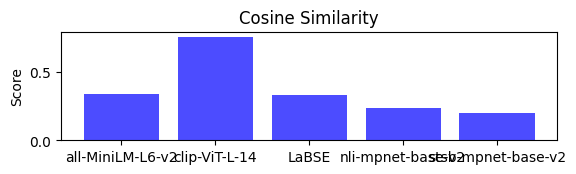

In [9]:
plt.subplot(3, 1, 1)
plt.bar(cumulative_results_df['Model'], cumulative_results_df['Cosine_Similarity'], color='blue', alpha=0.7)
plt.title('Cosine Similarity')
plt.ylabel('Score')


Text(0, 0.5, 'Distance')

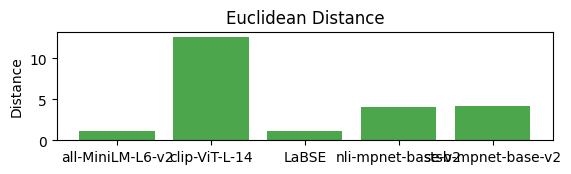

In [10]:

# Euclidean Distance
plt.subplot(3, 1, 2)
plt.bar(cumulative_results_df['Model'], cumulative_results_df['Euclidean_Distance'], color='green', alpha=0.7)
plt.title('Euclidean Distance')
plt.ylabel('Distance')

Text(0, 0.5, 'Distance')

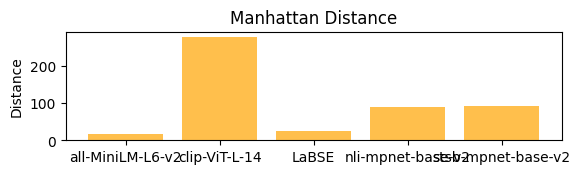

In [11]:
# Manhattan Distance
plt.subplot(3, 1, 3)
plt.bar(cumulative_results_df['Model'], cumulative_results_df['Manhattan_Distance'], color='orange', alpha=0.7)
plt.title('Manhattan Distance')
plt.ylabel('Distance')


In [12]:

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('similarity_comparison.png')

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>